# Import Libraries

In [1]:
import os
import glob
import numpy as np

from PIL import Image,ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# List Directories

In [2]:
base_dir = '../input/intel-image-classification/'
directory = os.listdir(base_dir)
directory

['seg_train', 'seg_pred', 'seg_test']

# Prepare Directory

In [3]:
train_dir = base_dir + 'seg_train/seg_train/'
test_dir = base_dir + 'seg_test/seg_test/'
val_dir = base_dir + 'seg_pred/seg_pred/'

# List out Categories/Classes

In [4]:
CLASSES = os.listdir(train_dir)
CLASSES

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

# How many Images per Class

In [5]:
 for imgType in CLASSES:
    imgTypePath = train_dir + "/" + imgType + "/"
    print("\nCLASS: " + imgType + ", Total images: "+ str(len(os.listdir(imgTypePath))))


CLASS: mountain, Total images: 2512

CLASS: street, Total images: 2382

CLASS: buildings, Total images: 2191

CLASS: sea, Total images: 2274

CLASS: forest, Total images: 2271

CLASS: glacier, Total images: 2404


# What is Image made up off?

(4, 4)


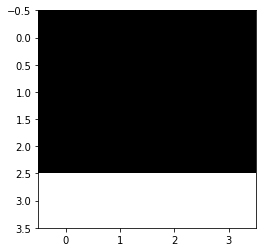

In [6]:
np_arr = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[255,255,255,255]])
print(np_arr.shape)
plt.imshow(np_arr, cmap='gray')

# Display size of an image per class and its content

mountain: (150, 150, 3)
street: (150, 150, 3)
buildings: (150, 150, 3)
sea: (150, 150, 3)
forest: (150, 150, 3)
glacier: (150, 150, 3)


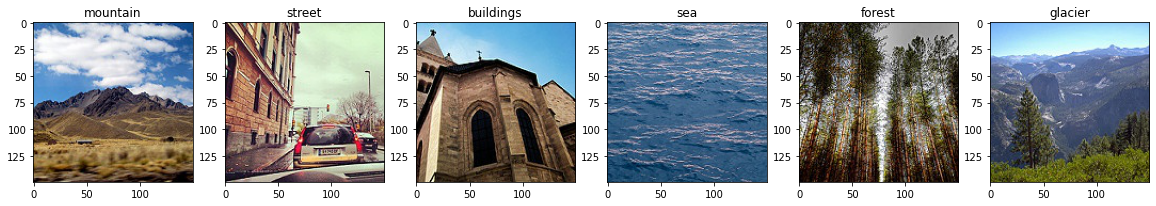

In [7]:
classIdx = 1
fig = plt.figure(figsize = (20, 50))
for imgType in CLASSES:
    #prepare the directory for the iterating class:
    imgTypePath = train_dir + "/" + imgType + "/"
    #Pick a random index in range 0 and total items in the directory
    rand_idx = np.random.randint(0, len(os.listdir(imgTypePath)))
    #Pull out file name from the list of files at the random index
    random_img_name = os.listdir(imgTypePath)[rand_idx]
    #Prepare full path to access randomly chosen image
    random_img_path = imgTypePath + random_img_name
    
    #LOAD IMAGE & DISPLAY
    imgObj = Image.open(random_img_path)
    #Print size of image object/array
    print(imgType + ": " + str(np.array(imgObj).shape))
    #Prepare subplot for matplotlib figure, for given class position
    subplt = fig.add_subplot(1, len(CLASSES), classIdx)
    #Load image object/array in to subplot
    subplt.imshow(imgObj)
    #Set class name as title
    subplt.set_title(imgType)
    #Increment class index 
    classIdx += 1


# What are 3 Channels

(150, 150, 3)


Text(0.5, 1.0, '10030.jpg')

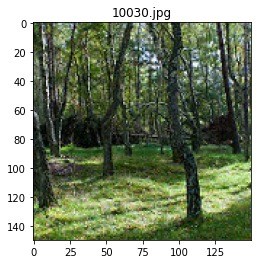

In [8]:
# Set image file path
IMG_FILE_NAME = "10030.jpg"
IMG_FILE_PATH = "../input/intel-image-classification/seg_train/seg_train/forest/" + IMG_FILE_NAME

# #Load image
sample_img = Image.open(IMG_FILE_PATH)

#Get image as array:
numpy_img = np.array(sample_img)

#Print the dimension
print(numpy_img.shape)

#Display image:
plt.imshow(numpy_img)
plt.title(IMG_FILE_NAME)


(150, 150)


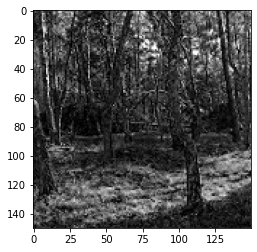

In [9]:
import cv2
b , g, r = cv2.split(np.array(sample_img))
print(r.shape)
plt.imshow(r,cmap='gray')

# Image Manipulations/Transformations

# 1 Convert to Grayscale

In [10]:
def convert_to_grayscale(img):
    return ImageOps.grayscale(img)

# 2 Reshape and Resize

In [11]:
def reshape_img(img, target_size=(150,150)):
    #Reshape any image to a fixed shape
    return img.resize(target_size, Image.LANCZOS)

# 3. Display image in numpy array format

In [12]:
def display_numpy_img(np_img, img_name="Transformed image"):
    plt.figure(figsize = (6,6))
    plt.imshow(np_img, cmap='gray')
    plt.title(img_name)

# Bundle above transformations = Pipeline

In [13]:
def transform_image(img_file_path):
    transf_img = Image.open(img_file_path)
    
    #Perform transformations in series
    transf_img = convert_to_grayscale(transf_img)
    transf_img = reshape_img(transf_img,transf_img.size)
    return np.array(transf_img)

# Load & Transform all images in a given directory

In [14]:
def load_dir_to_numpy(dir_path):
    file_list = glob.glob(dir_path+'/*')
    imgs = []
    #Load image by image
    for fname in file_list:
        img_np = transform_image(fname)
        imgs.append(img_np)
    return np.array(imgs)

In [15]:
def prepare_image_data(dir_path):
    imgs_arr_X = []
    data_arr_y = []
    classIdx = 0;
    for imgType in CLASSES:
        IMG_DIR = dir_path + "/" + imgType + "/"
    #     print("IMG_DIR: " + IMG_DIR)
        imgs_arr = load_dir_to_numpy(IMG_DIR)
        print(imgType + ": " + str(imgs_arr.shape))
        imgs_arr_X.extend(imgs_arr)
        data_y = np.full((imgs_arr.size,1), classIdx)
        data_arr_y.extend(data_y)
        classIdx += 1
    np_img_arr_X = np.array(imgs_arr_X)
    np_data_arr_y = np.array(data_arr_y)
    return np_img_arr_X,np_data_arr_y

In [16]:
np_img_arr_train_X,np_img_arr_train_y = prepare_image_data(train_dir)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


mountain: (2512,)
street: (2382,)
buildings: (2191,)
sea: (2274,)
forest: (2271,)
glacier: (2404,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [17]:

print("Total training X: " + str(np_img_arr_train_X.shape))#GRAY=14034x150x150;COLOR=14034x150x150x3
print("Total training y: " + str(np_img_arr_train_y.shape))

Total training X: (14034,)
Total training y: (14034, 1)


# Display a random training image

forest


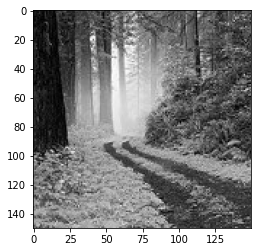

In [18]:
INDEX = 11002
classIdx = np_img_arr_train_y[INDEX][0]
print(CLASSES[classIdx])

#Let's see the image as well
plt.imshow(np_img_arr_train_X[INDEX], cmap='gray')